In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import umap
import hdbscan

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster


mpl.rcParams['figure.figsize'] = [20, 12]
mpl.rcParams['figure.dpi'] = 72

pd.set_option("display.max_rows", None, "display.max_columns", None)


In [135]:
pitching_stats_hof = pd.read_csv('../data/pitching_data_and_hof.csv')
pitching_stats_hof.drop(['Unnamed: 0'], axis=1, inplace=True)

In [136]:
pitching_stats_hof.head()

,playerID,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear
0,mathebo01,297,248,578,568,525,3,20,14868,5601,1573,70,532,1528,0.273633,NaN,253,NaN,3,21997.0,12,3497,NaN,NaN,NaN,15,0.0,NaN,4956.000000,2.856538,1871 - 1887,Bobby Mathews,1887
1,galvipu01,365,310,705,688,646,2,57,18010,6405,1903,121,745,1807,0.262339,NaN,221,NaN,2,25415.0,19,3352,NaN,NaN,NaN,15,1.0,Veterans,6003.333333,2.852915,1875 - 1892,Pud Galvin,1892
2,keefeti01,342,225,600,594,554,2,39,15149,4438,1474,75,1233,2564,0.226579,NaN,240,NaN,0,20941.0,7,2470,NaN,NaN,NaN,14,1.0,Veterans,5049.666667,2.627104,1880 - 1893,Tim Keefe,1893
3,welchmi01,307,210,565,549,525,4,41,14406,4588,1447,106,1297,1850,0.241550,NaN,274,NaN,1,20308.0,16,2556,NaN,NaN,NaN,13,1.0,Veterans,4802.000000,2.711995,1880 - 1892,Mickey Welch,1892
4,mullato01,284,220,555,504,468,15,30,13594,4195,1537,97,1408,1803,0.235820,NaN,343,NaN,3,19407.0,52,2523,NaN,NaN,NaN,13,0.0,NaN,4531.333333,3.052744,1881 - 1894,Tony Mullane,1894


In [21]:
pitching_stats_hof.shape

(956, 32)

In [137]:
pitching_stats_hof[pitching_stats_hof.HBP.isna()]

,playerID,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear
0,mathebo01,297,248,578,568,525,3,20,14868,5601,1573,70,532,1528,0.273633,NaN,253,NaN,3,21997.0,12,3497,NaN,NaN,NaN,15,0.0,NaN,4956.000000,2.856538,1871 - 1887,Bobby Mathews,1887
1,galvipu01,365,310,705,688,646,2,57,18010,6405,1903,121,745,1807,0.262339,NaN,221,NaN,2,25415.0,19,3352,NaN,NaN,NaN,15,1.0,Veterans,6003.333333,2.852915,1875 - 1892,Pud Galvin,1892
2,keefeti01,342,225,600,594,554,2,39,15149,4438,1474,75,1233,2564,0.226579,NaN,240,NaN,0,20941.0,7,2470,NaN,NaN,NaN,14,1.0,Veterans,5049.666667,2.627104,1880 - 1893,Tim Keefe,1893
3,welchmi01,307,210,565,549,525,4,41,14406,4588,1447,106,1297,1850,0.241550,NaN,274,NaN,1,20308.0,16,2556,NaN,NaN,NaN,13,1.0,Veterans,4802.000000,2.711995,1880 - 1892,Mickey Welch,1892
4,mullato01,284,220,555,504,468,15,30,13594,4195,1537,97,1408,1803,0.235820,NaN,343,NaN,3,19407.0,52,2523,NaN,NaN,NaN,13,0.0,NaN,4531.333333,3.052744,1881 - 1894,Tony Mullane,1894
5,radboch01,310,194,527,502,488,2,35,13582,4328,1347,118,875,1830,0.241653,NaN,214,NaN,0,18918.0,24,2273,NaN,NaN,NaN,11,1.0,Old Timers,4527.333333,2.677735,1880 - 1891,Old Hoss Radbourn,1891
6,buffich01,233,152,414,396,351,3,30,10212,3344,1120,87,856,1700,0.246680,NaN,174,NaN,2,14465.0,17,1824,NaN,NaN,NaN,11,0.0,NaN,3404.000000,2.961222,1882 - 1892,Charlie Buffinton,1892
7,clarkjo01,328,178,531,518,485,5,37,13609,4295,1417,159,1191,1978,0.239891,NaN,182,NaN,0,19146.0,12,2384,NaN,NaN,NaN,12,1.0,Veterans,4536.333333,2.811301,1882 - 1894,John Clarkson,1894
8,foremfr01,96,93,229,205,169,4,7,5165,1857,760,47,659,586,0.264455,NaN,82,NaN,0,7726.0,23,1186,NaN,NaN,NaN,11,0.0,NaN,1721.666667,3.972894,1884 - 1902,Frank Foreman,1902
10,maulal01,84,80,188,168,144,1,4,4322,1680,713,60,519,352,0.279907,NaN,53,NaN,4,6485.0,20,1088,NaN,NaN,NaN,15,0.0,NaN,1440.666667,4.454188,1884 - 1901,Al Maul,1901


In [138]:
contemporary_era_baseball = pitching_stats_hof[pitching_stats_hof.FinalYear >= 1980]

In [139]:
kmeans_df = contemporary_era_baseball.drop(['playerID', 'votedBy', 'TimeFrame', 'Name', 'FinalYear'], axis=1)

In [140]:
kmeans_df.isnull().sum()

W                0
L                0
G                0
GS               0
CG               0
SV               0
SHO              0
IPouts           0
H                0
ER               0
HR               0
BB               0
SO               0
BAOpp            0
IBB              0
WP               0
HBP              0
BK               0
BFP              0
GF               0
R                0
SH              43
SF              43
GIDP            74
Years_Played     0
HoF              0
IP               0
ERA              0
dtype: int64

In [37]:
kmeans_df.columns.tolist()

['W',
 'L',
 'G',
 'GS',
 'CG',
 'SV',
 'SHO',
 'IPouts',
 'H',
 'ER',
 'HR',
 'BB',
 'SO',
 'BAOpp',
 'IBB',
 'WP',
 'HBP',
 'BK',
 'BFP',
 'GF',
 'R',
 'SH',
 'SF',
 'GIDP',
 'Years_Played',
 'HoF',
 'IP',
 'ERA']

In [141]:
# we'll keep these values in mind when analzying
valid_columns = ['W',
 'L',
 'G',
 'GS',
 'CG',
 'SV',
 'SHO',
 'IPouts',
 'H',
 'ER',
 'HR',
 'BB',
 'SO',
 'BAOpp',
 'IBB',
 'WP',
 'HBP',
 'BK',
 'BFP',
 'GF',
 'R',
#  'SH',
#  'SF',
#  'GIDP',
 'Years_Played',
 'HoF',
 'IP',
 'ERA']

In [142]:
kmeans_df = kmeans_df[valid_columns]

In [143]:
kmeans_df.head()

,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,Years_Played,HoF,IP,ERA
345,283,237,898,625,180,18,31,13591,4620,1738,395,1083,2461,0.253693,116.0,128,122.0,6,19023.0,102,2038,25,1.0,4530.333333,3.452726
372,104,103,403,268,56,8,15,5819,1790,784,188,815,1303,0.235248,79.0,89,23.0,12,8279.0,42,864,16,0.0,1939.666667,3.637738
373,314,265,777,690,303,11,53,16051,4938,1846,399,1379,3534,0.235266,164.0,160,108.0,6,21953.0,33,2128,22,1.0,5350.333333,3.105227
380,288,231,760,700,162,4,46,14131,4783,1749,302,1259,2245,0.252881,102.0,187,98.0,16,19692.0,22,2017,26,0.0,4710.333333,3.341802
386,318,274,864,716,245,29,45,16213,5044,2012,482,1809,3342,0.237287,86.0,226,123.0,42,22677.0,83,2337,24,1.0,5404.333333,3.350645


In [144]:
labels = kmeans_df.HoF
kmeans_df_no_hof = kmeans_df.drop(['HoF'], axis=1)

In [261]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
distances = kmeans_model.fit_transform(kmeans_df_no_hof)

In [262]:
kmeans_df.head()

,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,Years_Played,HoF,IP,ERA
345,283,237,898,625,180,18,31,13591,4620,1738,395,1083,2461,0.253693,116.0,128,122.0,6,19023.0,102,2038,25,1.0,4530.333333,3.452726
372,104,103,403,268,56,8,15,5819,1790,784,188,815,1303,0.235248,79.0,89,23.0,12,8279.0,42,864,16,0.0,1939.666667,3.637738
373,314,265,777,690,303,11,53,16051,4938,1846,399,1379,3534,0.235266,164.0,160,108.0,6,21953.0,33,2128,22,1.0,5350.333333,3.105227
380,288,231,760,700,162,4,46,14131,4783,1749,302,1259,2245,0.252881,102.0,187,98.0,16,19692.0,22,2017,26,0.0,4710.333333,3.341802
386,318,274,864,716,245,29,45,16213,5044,2012,482,1809,3342,0.237287,86.0,226,123.0,42,22677.0,83,2337,24,1.0,5404.333333,3.350645


In [244]:
import mpld3


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [30/Jun/2022 21:09:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2022 21:09:46] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Jun/2022 21:09:46] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...


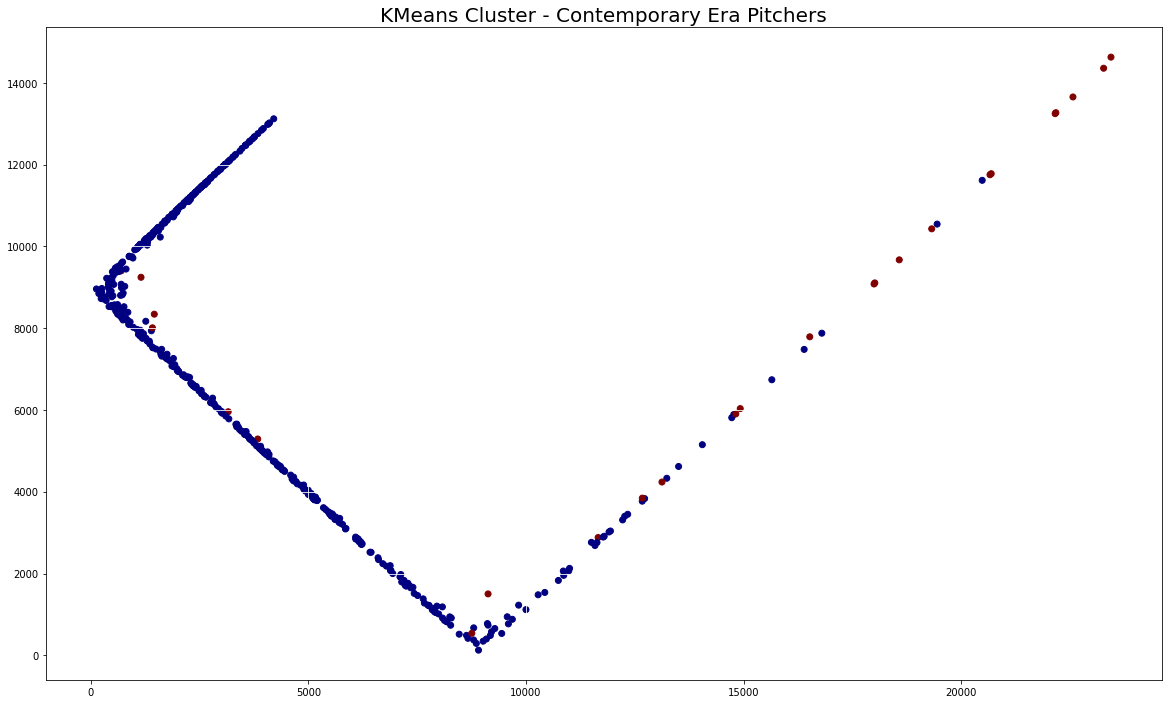

In [263]:
fig, ax = plt.subplots()
N = 100
c = kmeans_df.HoF
scatter = ax.scatter(distances[:,0],
                 distances[:,1],
                 c=kmeans_df.HoF,
#                  s=1000 * np.random.random(size=N),
#                  alpha=0.3,
                 cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("KMeans Cluster - Contemporary Era Pitchers", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=contemporary_era_baseball.playerID.tolist())
mpld3.plugins.connect(fig, tooltip)

mpld3.show()

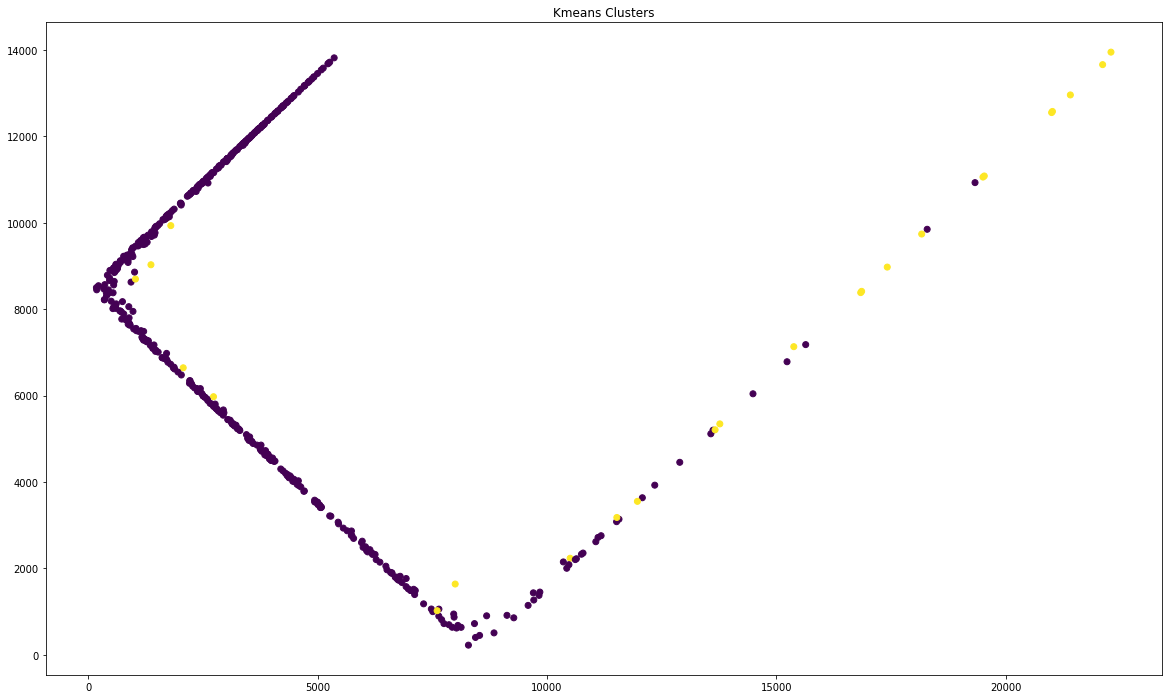

In [235]:
plt.scatter(distances[:,0], distances[:,1], c=kmeans_df.HoF)
plt.title('Kmeans Clusters')

plt.show()

In [220]:
COLOR_DESC_DF = pd.DataFrame(columns = ['description', 'color'])
for idx, val in contemporary_era_baseball.iterrows():
    color_ = 'gray'
    if val.HoF == 1:
        color_ = 'red'
    if val.playerID == 'martide01':
        color_ = 'blue'
    COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
                                          'color': color_}, ignore_index=True)

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF = COLOR_DESC_DF.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2227653858.py:8: FutureWar

In [221]:
def interactive_chart(embeddings):
    p = umap.plot.interactive(embeddings,
                              hover_data=COLOR_DESC_DF, 
                              labels=COLOR_DESC_DF.color)
    umap.plot.show(p)

In [264]:
standard_embedding_euclidean = umap.UMAP(n_neighbors=15, 
                               metric='euclidean',
                               min_dist=0.0,
                               n_components=2,
                               random_state=42,).fit(kmeans_df_no_hof)


In [265]:
interactive_chart(standard_embedding_euclidean)

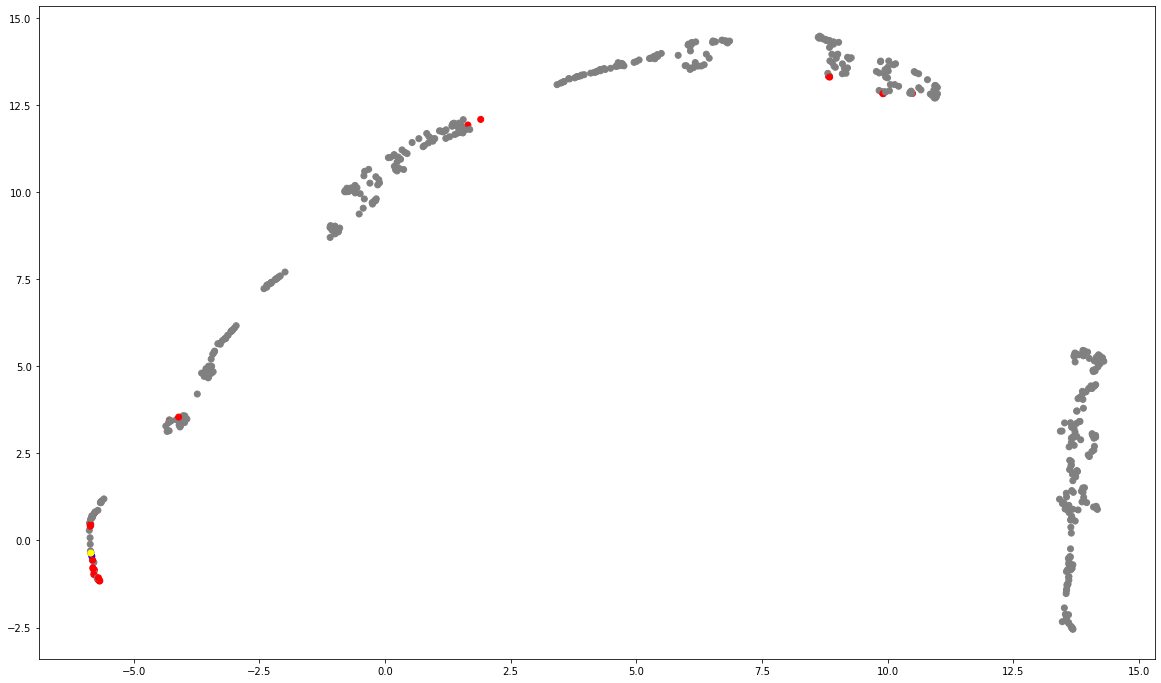

In [224]:
standard_embedding_euclidean_transform = umap.UMAP(n_neighbors=15, 
                                                   metric='euclidean',
                                                   min_dist=0.0,
                                                   n_components=2,
                                                   random_state=42,).fit_transform(kmeans_df_no_hof)

plt.scatter(standard_embedding_euclidean_transform[:, 0], 
            standard_embedding_euclidean_transform[:, 1], 
            c=temp.color, 
            cmap='Spectral');


In [225]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=5,
).fit_predict(standard_embedding_euclidean_transform)

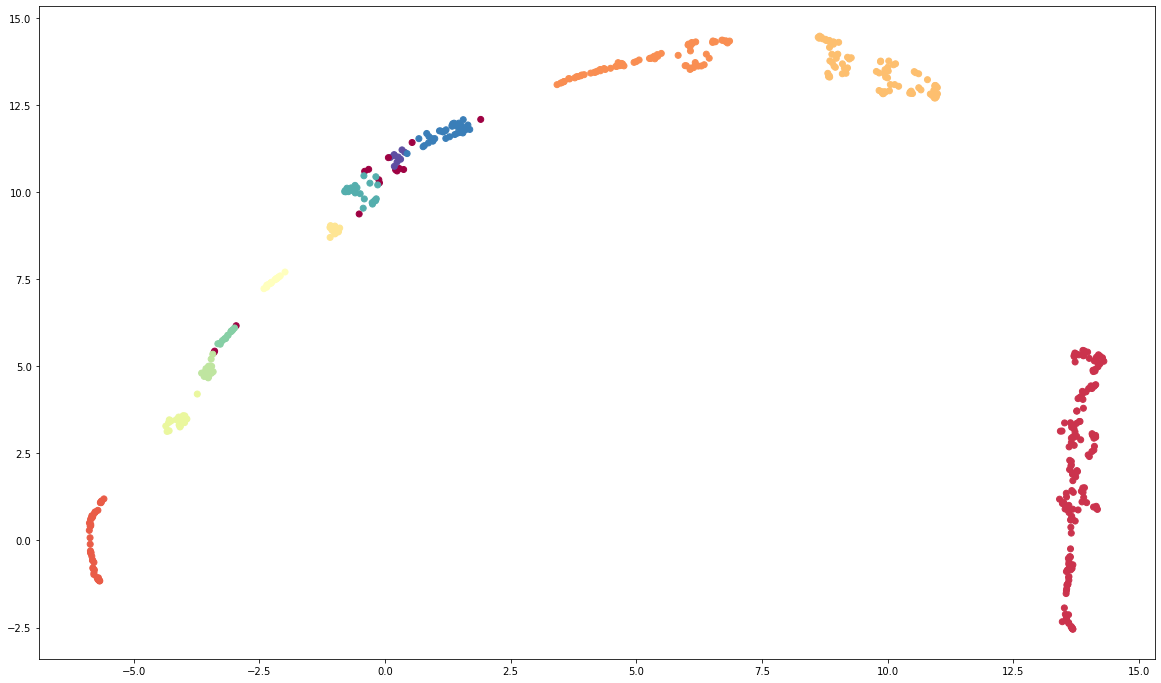

In [226]:
plt.scatter(standard_embedding_euclidean_transform[:, 0], 
            standard_embedding_euclidean_transform[:, 1], 
            c=labels, 
            cmap='Spectral');

In [227]:
contemporary_era_baseball['cluster_label'] = labels

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/3259366227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contemporary_era_baseball['cluster_label'] = labels


In [228]:
contemporary_era_baseball[contemporary_era_baseball.playerID =='martide01']

,playerID,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
520,martide01,245,193,692,562,122,8,30,11999,3897,1643,372,1165,2149,0.245156,71.0,83,122.0,30,16754.0,51,1835,120.0,109.0,332.0,23,0.0,NaN,3999.666667,3.697058,1976 - 1998,Dennis Martinez,1998,1


In [229]:
contemporary_era_baseball[contemporary_era_baseball.cluster_label == 1]

,playerID,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
345,kaatji01,283,237,898,625,180,18,31,13591,4620,1738,395,1083,2461,0.253693,116.0,128,122.0,6,19023.0,102,2038,NaN,NaN,NaN,25,1.0,NaN,4530.333333,3.452726,1959 - 1983,Jim Kaat,1983,1
373,perryga01,314,265,777,690,303,11,53,16051,4938,1846,399,1379,3534,0.235266,164.0,160,108.0,6,21953.0,33,2128,NaN,NaN,NaN,22,1.0,BBWAA,5350.333333,3.105227,1962 - 1983,Gaylord Perry,1983,1
380,johnto01,288,231,760,700,162,4,46,14131,4783,1749,302,1259,2245,0.252881,102.0,187,98.0,16,19692.0,22,2017,NaN,NaN,NaN,26,0.0,NaN,4710.333333,3.341802,1963 - 1989,Tommy John,1989,1
386,niekrph01,318,274,864,716,245,29,45,16213,5044,2012,482,1809,3342,0.237287,86.0,226,123.0,42,22677.0,83,2337,NaN,NaN,NaN,24,1.0,BBWAA,5404.333333,3.350645,1964 - 1987,Phil Niekro,1987,1
391,tiantlu01,229,172,573,484,187,15,49,10459,3075,1280,346,1104,2416,0.227206,53.0,27,49.0,4,14365.0,51,1400,NaN,NaN,NaN,19,0.0,NaN,3486.333333,3.304331,1964 - 1982,Luis Tiant,1982,1
392,wiseri01,188,181,506,455,138,0,30,9381,3227,1281,261,804,1647,0.255949,83.0,49,44.0,9,13157.0,15,1455,NaN,NaN,NaN,18,0.0,NaN,3127.000000,3.686920,1964 - 1982,Rick Wise,1982,1
394,carltst01,329,244,741,709,254,2,55,15652,4672,1864,414,1833,4136,0.229876,150.0,183,53.0,90,21683.0,13,2130,NaN,NaN,NaN,24,1.0,BBWAA,5217.333333,3.215436,1965 - 1988,Steve Carlton,1988,1
402,jenkife01,284,226,664,594,267,7,49,13502,4142,1669,484,997,3192,0.234754,116.0,62,84.0,18,18400.0,37,1853,NaN,NaN,NaN,19,1.0,BBWAA,4500.666667,3.337506,1965 - 1983,Fergie Jenkins,1983,1
409,palmeji01,268,152,558,521,211,4,53,11844,3349,1253,303,1311,2212,0.220430,37.0,85,38.0,11,16114.0,15,1395,NaN,NaN,NaN,19,1.0,BBWAA,3948.000000,2.856383,1965 - 1984,Jim Palmer,1984,1
415,ryanno01,324,292,807,773,222,3,61,16158,3923,1911,321,2795,5714,0.195359,78.0,277,158.0,33,22575.0,13,2178,NaN,NaN,NaN,27,1.0,BBWAA,5386.000000,3.193279,1966 - 1993,Nolan Ryan,1993,1


In [231]:
contemporary_era_baseball[contemporary_era_baseball.cluster_label == 1].shape

(45, 34)

In [233]:
contemporary_era_baseball[contemporary_era_baseball.cluster_label == 1].groupby('HoF').count()['playerID']

HoF
0.0    28
1.0    17
Name: playerID, dtype: int64

In [234]:
contemporary_era_baseball.to_csv('../data/contemporary_era_pitchers_clusters.csv')

# Advanced Pitching Analysis

In [277]:
pitching_df_gt_1950 = pd.read_csv('../data/pitchers_advanced_data_gt_1950.csv')
pitching_df_gt_1950.drop('Unnamed: 0', axis=1, inplace=True)
pitching_df_gt_1950.head()

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/2890622451.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  pitching_df_gt_1950 = pd.read_csv('../data/pitchers_advanced_data_gt_1950.csv')


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ERA+,IP,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,age,mlb_ID,name_common,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,salary,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_extras_adj,xRA_final,xRA_sprp_adj
0,aberal01,1950,1,CLE,AL,1.0,0.0,1.0,1.0,1.0,0.0,0.0,27.0,5.0,2.0,0.0,4.0,4.0,0.16,2.00,NaN,0.0,0.0,0.0,34.0,0.0,2.0,NaN,NaN,NaN,215.0,9.000000,1.000,5.0,0.0,4.0,4.0,1.00,26.0,0.0058,223.600000,4.472,1.0000,0.0,27.0,94.0,88.000,2.0,30.0,0.222,0.2098,-0.0044,0.28,0.0746,22.0,110017.0,Al Aber,3.13223,5.97499,1.824,1.985,2.036,1.982,2.888,2700.0,5.11423,0.7098,0.4234,4.760,0.174,NaN,4.036,0.0
1,albreed01,1950,1,SLA,AL,0.0,1.0,2.0,1.0,0.0,0.0,0.0,20.0,6.0,4.0,0.0,7.0,1.0,0.25,5.40,NaN,0.0,0.0,0.0,32.0,1.0,7.0,NaN,NaN,NaN,92.0,6.666667,1.950,8.1,0.0,9.4,1.3,0.14,24.0,0.0047,95.775000,3.831,1.0000,6.0,14.0,108.0,116.000,7.0,-88.0,0.222,-0.1658,-0.0051,-0.11,0.0577,21.0,110111.0,Ed Albrecht,6.05173,5.43303,1.989,1.957,-1.835,-1.875,-1.204,2500.0,5.11423,0.4171,0.4704,4.039,-0.414,NaN,5.165,0.0
2,alomalu01,1950,1,CHA,AL,7.0,2.0,42.0,0.0,0.0,0.0,4.0,263.0,77.0,37.0,6.0,53.0,49.0,0.23,3.80,NaN,3.0,1.0,1.0,388.0,21.0,44.0,NaN,NaN,NaN,118.0,87.666667,1.483,7.9,0.6,5.4,5.0,0.92,280.0,0.0602,118.537838,43.859,0.9055,218.0,44.0,98.0,100.684,44.0,19.0,0.222,0.4830,-0.1307,1.11,0.7619,27.0,110182.0,Luis Aloma,4.99382,5.31310,1.933,1.951,5.581,5.057,13.850,5000.0,5.11423,0.5115,0.4814,50.388,1.144,NaN,49.581,0.0
3,antonjo02,1950,1,BSN,NL,2.0,3.0,20.0,6.0,2.0,1.0,0.0,173.0,81.0,38.0,2.0,22.0,33.0,0.33,5.93,NaN,0.0,4.0,1.0,275.0,6.0,46.0,NaN,NaN,NaN,65.0,57.666667,1.786,12.6,0.3,3.4,5.2,1.50,217.0,0.0460,65.386842,24.847,0.3379,65.0,107.0,93.0,94.545,46.0,-17.0,0.211,-1.6640,0.1506,-0.91,0.6066,20.0,110287.0,Johnny Antonelli,5.57616,5.00521,1.942,1.911,-18.105,-17.723,-11.867,NaN,4.69002,0.4168,0.4690,28.722,-0.782,NaN,27.895,0.0
4,atkinja01,1950,1,BOS,AL,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,4.0,2.0,1.0,4.0,0.0,0.23,3.86,NaN,1.0,1.0,0.0,22.0,0.0,2.0,NaN,NaN,NaN,128.0,4.666667,1.714,7.7,1.9,7.7,0.0,0.00,17.0,0.0037,136.650000,2.733,0.7700,14.0,0.0,108.0,116.000,2.0,-10.0,0.222,0.0881,-0.0168,0.11,0.0400,29.0,110364.0,James Atkins,4.23623,5.56055,1.891,1.964,0.906,0.878,1.348,5000.0,5.11423,0.5881,0.4590,2.468,-0.037,NaN,2.906,0.0


In [343]:
pitching_df_1991 = pitching_df_gt_1950[pitching_df_gt_1950.yearID==1991]
pitching_df_1987_1993 = pitching_df_gt_1950[(pitching_df_gt_1950.yearID>=1987) & (pitching_df_gt_1950.yearID<=1993)]

In [344]:
pitching_df_1987_1993.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 12535 to 52994
Data columns (total 73 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   playerID               3489 non-null   object 
 1   yearID                 3489 non-null   int64  
 2   stint                  3489 non-null   int64  
 3   teamID                 3467 non-null   object 
 4   lgID                   3489 non-null   object 
 5   W                      3467 non-null   float64
 6   L                      3467 non-null   float64
 7   G                      3467 non-null   float64
 8   GS                     3467 non-null   float64
 9   CG                     3467 non-null   float64
 10  SHO                    3467 non-null   float64
 11  SV                     3467 non-null   float64
 12  IPouts                 3467 non-null   float64
 13  H                      3467 non-null   float64
 14  ER                     3467 non-null   float64
 15 

In [345]:
pitching_df_1991.drop('xRA_extras_adj', axis=1, inplace=True)
pitching_df_1991.drop('salary', axis=1, inplace=True)

pitching_df_1987_1993.drop('xRA_extras_adj', axis=1, inplace=True)
pitching_df_1987_1993.drop('salary', axis=1, inplace=True)


/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/255792974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_1991.drop('xRA_extras_adj', axis=1, inplace=True)
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/255792974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching_df_1991.drop('salary', axis=1, inplace=True)
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/255792974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [346]:
pitching_df_1987_1993.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 12535 to 52994
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   playerID               3489 non-null   object 
 1   yearID                 3489 non-null   int64  
 2   stint                  3489 non-null   int64  
 3   teamID                 3467 non-null   object 
 4   lgID                   3489 non-null   object 
 5   W                      3467 non-null   float64
 6   L                      3467 non-null   float64
 7   G                      3467 non-null   float64
 8   GS                     3467 non-null   float64
 9   CG                     3467 non-null   float64
 10  SHO                    3467 non-null   float64
 11  SV                     3467 non-null   float64
 12  IPouts                 3467 non-null   float64
 13  H                      3467 non-null   float64
 14  ER                     3467 non-null   float64
 15 

In [321]:
pitching_df_1991 = pitching_df_1991.dropna(thresh=50)

In [347]:
pitching_df_1987_1993.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ERA+,IP,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,age,mlb_ID,name_common,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj
12535,aasedo01,1987,1,BAL,AL,1.0,0.0,7.0,0.0,0.0,0.0,2.0,24.0,8.0,2.0,1.0,4.0,3.0,0.276,2.25,0.0,0.0,0.0,0.0,33.0,6.0,2.0,0.0,0.0,2.0,194.0,8.000000,1.500,9.0,1.1,4.5,3.4,0.75,25.0,0.0054,203.300000,4.066,2.1886,24.0,0.0,98.0,97.273,2.0,-9.2,0.218,0.1946,0.1052,0.38,0.0778,32.0,110003.0,Don Aase,4.65357,5.05256,1.905,1.927,1.970,1.963,2.793,4.9340,0.5278,0.4886,4.378,-0.050,3.970,-0.347
12536,ackerji01,1987,1,ATL,NL,4.0,9.0,68.0,0.0,0.0,0.0,14.0,344.0,109.0,53.0,11.0,51.0,68.0,0.253,4.16,4.0,1.0,4.0,0.0,491.0,41.0,57.0,3.0,3.0,16.0,104.0,114.666667,1.395,8.6,0.9,4.0,5.3,1.33,361.0,0.0771,104.437736,55.352,1.3741,344.0,0.0,106.0,105.829,57.0,-41.6,0.200,0.1632,-0.1752,1.10,1.1080,28.0,110033.0,Jim Acker,4.50058,4.68458,1.872,1.883,2.556,1.559,13.373,4.5235,0.5024,0.4835,57.446,-3.207,59.556,-4.377
12537,agostju01,1987,1,HOU,NL,1.0,1.0,27.0,0.0,0.0,0.0,2.0,82.0,26.0,8.0,1.0,10.0,6.0,0.248,2.63,1.0,1.0,0.0,0.0,118.0,13.0,12.0,3.0,0.0,2.0,149.0,27.333333,1.317,8.6,0.3,3.3,2.0,0.60,101.0,0.0234,151.037500,12.083,1.0544,82.0,0.0,96.0,95.051,12.0,-24.6,0.200,0.1080,-0.0461,0.33,0.2640,29.0,110088.0,Juan Agosto,4.48491,4.62020,1.871,1.879,1.280,1.042,3.859,4.5235,0.5040,0.4901,14.500,-0.576,13.280,-1.105
12538,aguilri01,1987,1,NYN,NL,11.0,3.0,18.0,17.0,1.0,0.0,0.0,345.0,124.0,46.0,12.0,33.0,77.0,0.276,3.60,2.0,9.0,3.0,0.0,494.0,0.0,53.0,7.0,2.0,14.0,105.0,115.000000,1.365,9.7,0.9,2.6,6.0,2.33,372.0,0.0824,105.923913,48.725,1.5700,10.0,335.0,93.0,92.126,53.0,-21.5,0.200,0.2484,-0.0516,1.26,1.0677,25.0,110090.0,Rick Aguilera,4.39128,5.13377,1.865,1.908,3.380,2.380,14.229,4.5235,0.5138,0.4399,57.526,-1.772,56.380,1.901
12539,akerfda01,1987,1,CLE,AL,2.0,6.0,16.0,13.0,1.0,0.0,0.0,224.0,84.0,56.0,18.0,38.0,42.0,0.284,6.75,1.0,7.0,7.0,0.0,347.0,0.0,60.0,2.0,4.0,6.0,67.0,74.666667,1.634,10.1,2.2,4.6,5.1,1.11,249.0,0.0527,67.217857,37.642,0.5667,24.0,200.0,101.0,100.363,60.0,-47.9,0.218,-1.2992,-0.0209,-0.61,0.7073,25.0,110101.0,Darrel Akerfelds,5.82756,5.41812,1.968,1.947,-14.233,-14.297,-6.550,4.9340,0.4188,0.4546,42.181,-2.524,45.767,0.896


In [383]:
test.groupby('playerID').agg({'W':'mean', 'L':'sum','ERA_plus':'mean'})


,W,L,ERA_plus
playerID,,,
martide01,13.857143,66.0,128.351721


<AxesSubplot:ylabel='playerID'>

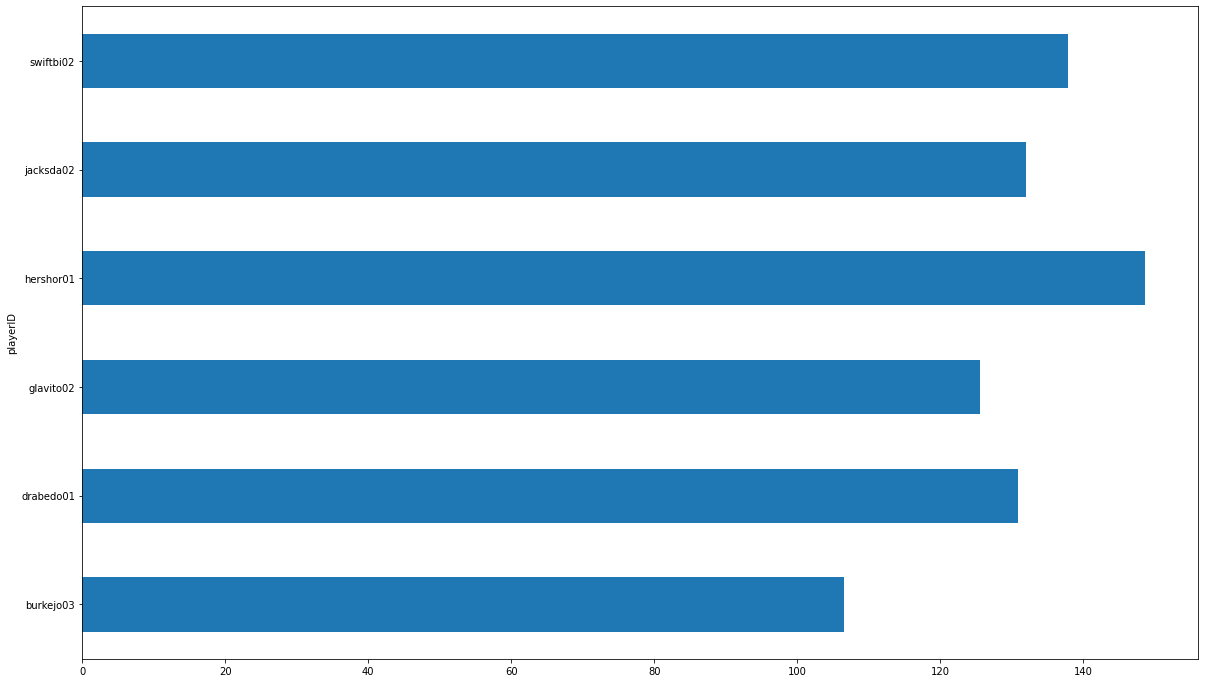

In [430]:
pitching_df_1987_1993[(pitching_df_1987_1993.lgID == 'NL') 
                      & (pitching_df_1987_1993.W > 20)].groupby('playerID').mean()['ERA_plus'].plot.barh()

In [387]:
((pitching_df_1987_1993.groupby('playerID')['W'].mean()>10)== True).index

Index(['aasedo01', 'abbotji01', 'abbotky01', 'abbotpa01', 'ackerji01',
       'adkinst01', 'agostju01', 'aguilri01', 'akerfda01', 'albagi01',
       ...
       'yettri01', 'yorkmi01', 'youmafl01', 'youngan01', 'youngcl01',
       'youngcu01', 'youngma01', 'youngpe02', 'zavarcl01', 'ziemst01'],
      dtype='object', name='playerID', length=1015)

In [431]:
grp_tem = pitching_df_1987_1993[pitching_df_1987_1993.IP>=100].groupby('playerID')['W'].mean()>12
idx_ = np.where(grp_tem == True)
dominant_pitchers = grp_tem.index[idx_[0]].tolist()
# list(np.where(df["Sales"] >= 300))

In [432]:
dominant_pitchers

['appieke01',
 'astacpe01',
 'averyst01',
 'bannifl01',
 'benesan01',
 'bielemi01',
 'brownke01',
 'brownto05',
 'burkejo03',
 'clemero02',
 'coneda01',
 'drabedo01',
 'eldreca01',
 'ericksc01',
 'farrst01',
 'finlech01',
 'flemida01',
 'garresc01',
 'glavito02',
 'goodedw01',
 'greento01',
 'gullibi01',
 'guzmajo01',
 'guzmaju01',
 'hentgpa01',
 'hershor01',
 'higuete01',
 'hurstbr01',
 'johnsda04',
 'johnsra05',
 'keyji01',
 'langsma01',
 'maddugr01',
 'martide01',
 'martira02',
 'mcdowja01',
 'mooremi01',
 'morrija02',
 'mussimi01',
 'nagych01',
 'reuscri01',
 'rhoderi01',
 'rijojo01',
 'rogerke01',
 'saberbr01',
 'schilcu01',
 'scottmi03',
 'smilejo01',
 'smoltjo01',
 'stewada01',
 'stiebda01',
 'sutclri01',
 'tapanke01',
 'tewksbo01',
 'violafr01',
 'welchbo01',
 'whitsed01',
 'wickmbo01',
 'wittmi01']

In [433]:
selected_pitching_1987_1993 = pitching_df_1987_1993[pitching_df_1987_1993.playerID.isin(dominant_pitchers)]

In [434]:
mcdowja01_df = selected_pitching_1987_1993[selected_pitching_1987_1993.playerID == 'mcdowja01']

In [428]:
selected_pitching_1987_1993[selected_pitching_1987_1993.playerID == 'martide01']

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ERA+,IP,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,age,mlb_ID,name_common,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj
12798,martide01,1987,1,MON,NL,11.0,4.0,22.0,22.0,2.0,1.0,0.0,434.0,133.0,53.0,9.0,40.0,84.0,0.244,3.30,2.0,4.0,6.0,2.0,599.0,0.0,59.0,4.0,3.0,8.0,127.0,144.666667,1.196,8.3,0.6,2.5,5.2,2.10,466.0,0.1025,127.958491,67.818,1.00,0.0,434.0,103.0,102.144,59.0,-18.7,0.200,2.5168,-0.0618,3.79,1.3397,33.0,118371.0,Dennis Martinez,3.49719,5.15162,1.810,1.909,23.837,22.579,37.485,4.52350,0.6144,0.4383,76.407,-1.917,82.837,2.774
13255,martide01,1988,1,MON,NL,15.0,13.0,34.0,34.0,9.0,2.0,0.0,706.0,215.0,71.0,21.0,55.0,120.0,0.239,2.72,3.0,5.0,6.0,10.0,968.0,0.0,94.0,2.0,6.0,17.0,132.0,235.333333,1.147,8.2,0.8,2.1,4.6,2.18,787.0,0.1677,132.539437,94.103,1.00,0.0,706.0,104.0,103.605,94.0,39.4,0.170,0.9588,-0.1012,3.02,2.1634,34.0,118371.0,Dennis Martinez,3.62146,4.41023,1.774,1.826,9.154,8.088,28.095,3.85934,0.5282,0.4394,102.860,6.607,103.154,3.312
13739,martide01,1989,1,MON,NL,16.0,7.0,34.0,33.0,5.0,2.0,0.0,696.0,227.0,82.0,21.0,49.0,142.0,0.257,3.18,4.0,5.0,7.0,2.0,950.0,1.0,88.0,8.0,2.0,21.0,111.0,232.000000,1.190,8.8,0.8,1.9,5.5,2.90,752.0,0.1656,111.403659,91.351,2.24,6.0,690.0,101.0,100.659,88.0,-28.0,0.171,2.8458,-0.1366,4.72,2.0127,35.0,118371.0,Dennis Martinez,3.23282,4.43749,1.752,1.831,23.554,23.378,41.305,3.92041,0.5837,0.4435,102.742,-4.637,111.554,3.445
14248,martide01,1990,1,MON,NL,10.0,11.0,32.0,32.0,7.0,2.0,0.0,678.0,191.0,74.0,16.0,49.0,156.0,0.228,2.95,9.0,1.0,6.0,1.0,908.0,0.0,80.0,11.0,3.0,13.0,123.0,226.000000,1.062,7.6,0.6,2.0,6.2,3.18,697.0,0.1505,123.922973,91.703,1.00,0.0,678.0,96.0,94.511,80.0,-19.7,0.184,2.8128,-0.1247,4.66,1.9712,36.0,118371.0,Dennis Martinez,3.45480,4.79359,1.787,1.871,28.426,24.325,47.017,4.21496,0.5879,0.4401,107.916,-2.965,108.426,3.842
14771,martide01,1991,1,MON,NL,14.0,11.0,31.0,31.0,9.0,5.0,0.0,666.0,187.0,59.0,9.0,62.0,123.0,0.226,2.39,3.0,3.0,4.0,0.0,905.0,0.0,70.0,7.0,3.0,14.0,152.0,222.000000,1.122,7.6,0.4,2.5,5.0,1.98,716.0,0.1578,152.910169,90.217,1.00,0.0,666.0,99.0,99.092,70.0,10.8,0.179,3.9370,-0.1233,5.75,1.9332,37.0,118371.0,Dennis Martinez,3.04885,4.67136,1.752,1.857,34.180,32.622,51.949,4.10117,0.6270,0.4399,103.226,1.704,104.180,3.613
15241,martide01,1992,1,MON,NL,16.0,11.0,32.0,32.0,6.0,0.0,0.0,679.0,172.0,62.0,12.0,60.0,147.0,0.211,2.47,3.0,2.0,9.0,0.0,900.0,0.0,75.0,12.0,5.0,9.0,140.0,226.333333,1.025,6.8,0.5,2.4,5.8,2.45,684.0,0.1503,141.174194,87.528,1.00,0.0,679.0,99.0,98.836,75.0,-1.5,0.167,2.9952,-0.1528,4.68,1.8419,38.0,118371.0,Dennis Martinez,3.10611,4.35925,1.739,1.823,25.521,24.198,41.412,3.86230,0.5936,0.4451,98.067,-0.225,100.521,3.413
15760,martide01,1993,1,MON,NL,15.0,9.0,35.0,34.0,2.0,0.0,1.0,674.0,211.0,96.0,27.0,64.0,138.0,0.246,3.85,7.0,2.0,11.0,4.0,945.0,1.0,110.0,10.0,4.0,20.0,109.0,224.666667,1.224,8.5,1.1,2.6,5.5,2.16,732.0,0.1561,108.553125,104.211,3.95,1.0,673.0,103.0,103.333,110.0,-21.9,0.195,1.1025,-0.1007,2.88,1.8814,39.0,118371.0,Dennis Martinez,4.20592,5.03440,1.853,1.902,14.146,10.381,32.986,4.50252,0.5315,0.4471,112.761,-3.419,124.146,3.962


In [435]:
mcdowja01_df

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ERA+,IP,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,age,mlb_ID,name_common,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj
12807,mcdowja01,1987,1,CHA,AL,3.0,0.0,4.0,4.0,0.0,0.0,0.0,84.0,16.0,6.0,1.0,6.0,15.0,0.168,1.93,0.0,0.0,2.0,0.0,103.0,0.0,6.0,0.0,0.0,2.0,238.0,28.000000,0.786,5.1,0.3,1.9,4.8,2.50,81.0,0.0173,241.666667,14.500,1.0,0.0,84.0,103.0,101.146,6.0,98.3,0.218,0.9036,-0.0170,1.15,0.2600,21.0,118656.0,Jack McDowell,2.86875,5.66018,1.796,1.959,8.285,8.261,11.166,4.93400,0.7259,0.4332,15.314,1.701,14.285,0.510
13266,mcdowja01,1988,1,CHA,AL,5.0,10.0,26.0,26.0,1.0,0.0,0.0,476.0,147.0,70.0,12.0,68.0,84.0,0.245,3.97,5.0,11.0,7.0,1.0,687.0,0.0,85.0,6.0,7.0,16.0,100.0,158.666667,1.355,8.3,0.7,3.9,4.8,1.24,528.0,0.1081,100.365714,70.256,1.0,0.0,476.0,100.0,99.755,85.0,5.8,0.193,-0.4940,-0.0940,0.89,1.4828,22.0,118656.0,Jack McDowell,4.56151,4.93213,1.867,1.889,-4.558,-4.744,9.932,4.37905,0.4810,0.4441,78.816,0.627,80.442,2.451
14258,mcdowja01,1990,1,CHA,AL,14.0,9.0,33.0,33.0,4.0,0.0,0.0,615.0,189.0,87.0,20.0,77.0,165.0,0.244,3.82,0.0,7.0,7.0,1.0,866.0,0.0,93.0,1.0,5.0,12.0,100.0,205.000000,1.298,8.3,0.9,3.4,7.2,2.14,616.0,0.1348,100.687356,87.598,1.0,0.0,615.0,98.0,98.277,93.0,66.4,0.193,-0.0165,-0.1197,1.88,2.0132,24.0,118656.0,Jack McDowell,4.33329,4.92669,1.850,1.886,-1.595,-0.141,17.902,4.32902,0.4995,0.4393,98.540,8.951,91.405,3.419
14782,mcdowja01,1991,1,CHA,AL,17.0,10.0,35.0,35.0,15.0,3.0,0.0,761.0,212.0,96.0,19.0,82.0,191.0,0.228,3.41,2.0,10.0,4.0,1.0,1028.0,0.0,97.0,8.0,4.0,12.0,116.0,253.666667,1.159,7.5,0.7,2.9,6.8,2.33,751.0,0.1619,117.001042,112.321,1.0,5.0,756.0,97.0,97.093,97.0,63.7,0.199,2.0055,-0.1787,4.27,2.4443,25.0,118656.0,Jack McDowell,3.94838,5.18482,1.836,1.909,18.424,18.444,43.366,4.47535,0.5573,0.4302,124.829,10.313,115.424,4.364
15252,mcdowja01,1992,1,CHA,AL,20.0,10.0,34.0,34.0,13.0,1.0,0.0,782.0,247.0,92.0,21.0,75.0,178.0,0.251,3.18,9.0,6.0,7.0,0.0,1079.0,0.0,95.0,8.0,6.0,12.0,123.0,260.666667,1.235,8.5,0.7,2.6,6.1,2.37,819.0,0.1696,122.033696,112.271,1.0,0.0,782.0,98.0,97.824,95.0,39.2,0.194,2.7948,-0.1663,5.26,2.6292,26.0,118656.0,Jack McDowell,3.59690,5.08881,1.804,1.895,24.399,24.700,50.415,4.32337,0.5822,0.4234,124.507,6.648,119.399,4.196
15772,mcdowja01,1993,1,CHA,AL,22.0,10.0,34.0,34.0,10.0,4.0,0.0,770.0,261.0,96.0,20.0,69.0,158.0,0.266,3.37,6.0,8.0,3.0,1.0,1067.0,0.0,104.0,8.0,6.0,19.0,124.0,256.666667,1.286,9.2,0.7,2.4,5.5,2.29,837.0,0.1822,125.100000,120.096,1.0,1.0,769.0,97.0,97.125,104.0,60.6,0.212,1.9210,-0.1375,4.38,2.6009,27.0,118656.0,Jack McDowell,4.19073,5.54944,1.866,1.943,16.285,18.430,44.328,4.73279,0.5565,0.4233,130.420,11.041,120.285,4.467


In [426]:
(9*mcdowja01_df.ER)/mcdowja01_df.IP

12807    1.928571
13266    3.970588
14258    3.819512
14782    3.406045
15252    3.176471
15772    3.366234
dtype: float64

In [ ]:
mcdowja01_df.IPouts/

<AxesSubplot:ylabel='playerID'>

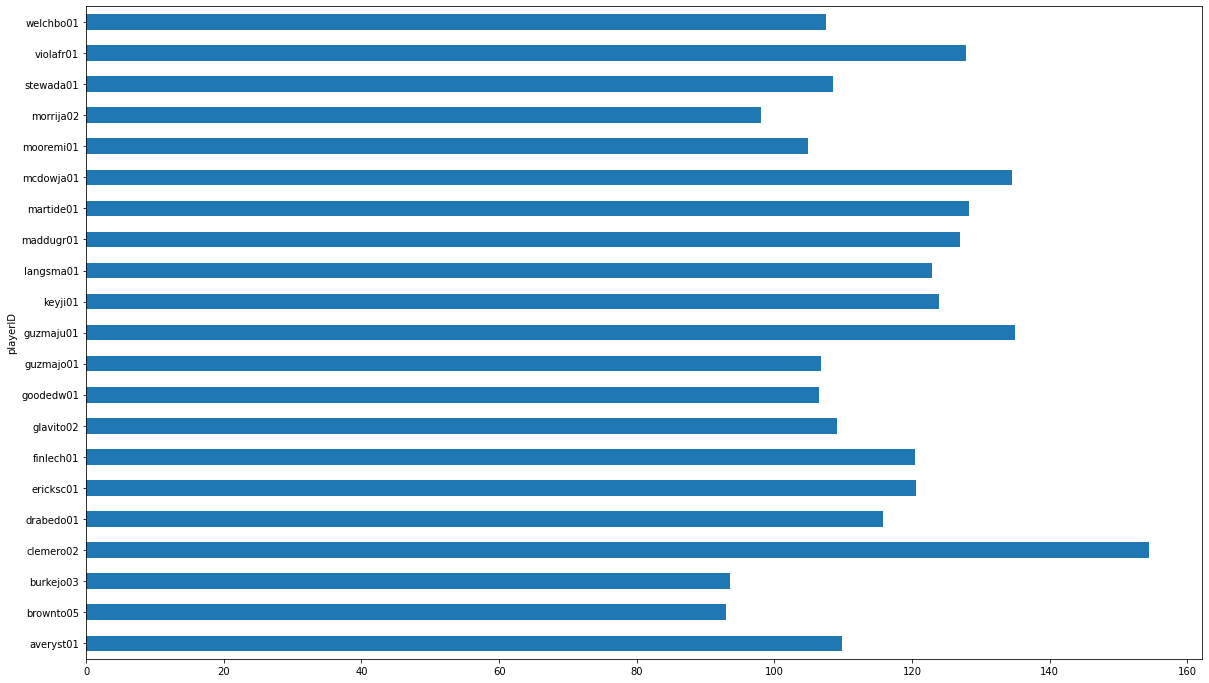

In [419]:
selected_pitching_1987_1993.groupby('playerID').mean()['ERA_plus'].plot.barh()

# aggregating season totals with advanced

In [449]:
pitching_df_gt_1950 = pitching_df_gt_1950[pitching_df_gt_1950['teamID'].notna()]

In [452]:
pitching_df_gt_1950.drop(['salary', 'xRA_extras_adj'], axis=1, inplace=True)

In [467]:
pitching_df_gt_1950 = pitching_df_gt_1950[pitching_df_gt_1950['ERA_plus'].notna()]
pitching_df_gt_1950 = pitching_df_gt_1950[pitching_df_gt_1950['ERA'].notna()]
pitching_df_gt_1950 = pitching_df_gt_1950[pitching_df_gt_1950['SO_W'].notna()]

In [468]:
pitching_df_gt_1950[pitching_df_gt_1950.SO_W.isna()].head(20)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,ERA+,IP,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,age,mlb_ID,name_common,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj


In [ ]:
column_logic = {
    'W': 'sum',
    'L': 'sum',
    
}

test.groupby('playerID').agg({'W':'mean', 'L':'sum','ERA_plus':'mean'})


In [469]:
pitching_df_gt_1950.isnull().sum()

playerID                    0
yearID                      0
stint                       0
teamID                      0
lgID                        0
W                           0
L                           0
G                           0
GS                          0
CG                          0
SHO                         0
SV                          0
IPouts                      0
H                           0
ER                          0
HR                          0
BB                          0
SO                          0
BAOpp                       0
ERA                         0
IBB                      1198
WP                          0
HBP                         0
BK                          0
BFP                         0
GF                          0
R                           0
SH                       5613
SF                       5613
GIDP                     6698
ERA+                        0
IP                          0
WHIP                        0
H9        

In [478]:
pitching_df_gt_1950.drop(['IP'], axis=1, inplace=True)

In [479]:
contemporary_era_baseball.head()

,playerID,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
345,kaatji01,283,237,898,625,180,18,31,13591,4620,1738,395,1083,2461,0.253693,116.0,128,122.0,6,19023.0,102,2038,NaN,NaN,NaN,25,1.0,NaN,4530.333333,3.452726,1959 - 1983,Jim Kaat,1983,1
372,normafr01,104,103,403,268,56,8,15,5819,1790,784,188,815,1303,0.235248,79.0,89,23.0,12,8279.0,42,864,NaN,NaN,NaN,16,0.0,NaN,1939.666667,3.637738,1962 - 1980,Fred Norman,1980,-1
373,perryga01,314,265,777,690,303,11,53,16051,4938,1846,399,1379,3534,0.235266,164.0,160,108.0,6,21953.0,33,2128,NaN,NaN,NaN,22,1.0,BBWAA,5350.333333,3.105227,1962 - 1983,Gaylord Perry,1983,1
380,johnto01,288,231,760,700,162,4,46,14131,4783,1749,302,1259,2245,0.252881,102.0,187,98.0,16,19692.0,22,2017,NaN,NaN,NaN,26,0.0,NaN,4710.333333,3.341802,1963 - 1989,Tommy John,1989,1
386,niekrph01,318,274,864,716,245,29,45,16213,5044,2012,482,1809,3342,0.237287,86.0,226,123.0,42,22677.0,83,2337,NaN,NaN,NaN,24,1.0,BBWAA,5404.333333,3.350645,1964 - 1987,Phil Niekro,1987,1


In [481]:
first_column = pitching_df_gt_1950.pop('playerID')

In [482]:
pitching_df_gt_1950.insert(29, 'playerID', first_column)

In [509]:
pitching_df_gt_1950.head()

,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,age,mlb_ID,name_common,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj
0,1950,1,CLE,AL,1.0,0.0,1.0,1.0,1.0,0.0,0.0,27.0,5.0,2.0,0.0,4.0,4.0,0.16,2.00,NaN,0.0,0.0,0.0,34.0,0.0,2.0,NaN,NaN,NaN,aberal01,215.0,1.000,5.0,0.0,4.0,4.0,1.00,26.0,0.0058,223.600000,4.472,1.0000,0.0,27.0,94.0,88.000,2.0,30.0,0.222,0.2098,-0.0044,0.28,0.0746,22.0,110017.0,Al Aber,3.13223,5.97499,1.824,1.985,2.036,1.982,2.888,5.11423,0.7098,0.4234,4.760,0.174,4.036,0.0
1,1950,1,SLA,AL,0.0,1.0,2.0,1.0,0.0,0.0,0.0,20.0,6.0,4.0,0.0,7.0,1.0,0.25,5.40,NaN,0.0,0.0,0.0,32.0,1.0,7.0,NaN,NaN,NaN,albreed01,92.0,1.950,8.1,0.0,9.4,1.3,0.14,24.0,0.0047,95.775000,3.831,1.0000,6.0,14.0,108.0,116.000,7.0,-88.0,0.222,-0.1658,-0.0051,-0.11,0.0577,21.0,110111.0,Ed Albrecht,6.05173,5.43303,1.989,1.957,-1.835,-1.875,-1.204,5.11423,0.4171,0.4704,4.039,-0.414,5.165,0.0
2,1950,1,CHA,AL,7.0,2.0,42.0,0.0,0.0,0.0,4.0,263.0,77.0,37.0,6.0,53.0,49.0,0.23,3.80,NaN,3.0,1.0,1.0,388.0,21.0,44.0,NaN,NaN,NaN,alomalu01,118.0,1.483,7.9,0.6,5.4,5.0,0.92,280.0,0.0602,118.537838,43.859,0.9055,218.0,44.0,98.0,100.684,44.0,19.0,0.222,0.4830,-0.1307,1.11,0.7619,27.0,110182.0,Luis Aloma,4.99382,5.31310,1.933,1.951,5.581,5.057,13.850,5.11423,0.5115,0.4814,50.388,1.144,49.581,0.0
3,1950,1,BSN,NL,2.0,3.0,20.0,6.0,2.0,1.0,0.0,173.0,81.0,38.0,2.0,22.0,33.0,0.33,5.93,NaN,0.0,4.0,1.0,275.0,6.0,46.0,NaN,NaN,NaN,antonjo02,65.0,1.786,12.6,0.3,3.4,5.2,1.50,217.0,0.0460,65.386842,24.847,0.3379,65.0,107.0,93.0,94.545,46.0,-17.0,0.211,-1.6640,0.1506,-0.91,0.6066,20.0,110287.0,Johnny Antonelli,5.57616,5.00521,1.942,1.911,-18.105,-17.723,-11.867,4.69002,0.4168,0.4690,28.722,-0.782,27.895,0.0
4,1950,1,BOS,AL,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,4.0,2.0,1.0,4.0,0.0,0.23,3.86,NaN,1.0,1.0,0.0,22.0,0.0,2.0,NaN,NaN,NaN,atkinja01,128.0,1.714,7.7,1.9,7.7,0.0,0.00,17.0,0.0037,136.650000,2.733,0.7700,14.0,0.0,108.0,116.000,2.0,-10.0,0.222,0.0881,-0.0168,0.11,0.0400,29.0,110364.0,James Atkins,4.23623,5.56055,1.891,1.964,0.906,0.878,1.348,5.11423,0.5881,0.4590,2.468,-0.037,2.906,0.0


In [510]:
pitching_df_gt_1950.drop(['age', 'mlb_ID', 'name_common'], axis=1, inplace=True)

In [511]:
advanced_stats = pitching_df_gt_1950.iloc[:, 29:]

In [512]:
logic_params = {}
for columns in advanced_stats.columns:
    logic_params[columns] = 'mean'

In [513]:
del logic_params['playerID']

In [514]:
logic_params

{'ERA+': 'mean',
 'WHIP': 'mean',
 'H9': 'mean',
 'HR9': 'mean',
 'BB9': 'mean',
 'SO9': 'mean',
 'SO_W': 'mean',
 'BIP': 'mean',
 'BIP_perc': 'mean',
 'ERA_plus': 'mean',
 'ER_lg': 'mean',
 'GR_leverage_index_avg': 'mean',
 'IPouts_relief': 'mean',
 'IPouts_start': 'mean',
 'PPF': 'mean',
 'PPF_custom': 'mean',
 'RA': 'mean',
 'RS_def_total': 'mean',
 'RpO_replacement': 'mean',
 'WAA': 'mean',
 'WAA_adj': 'mean',
 'WAR': 'mean',
 'WAR_rep': 'mean',
 'oppRpG': 'mean',
 'oppRpG_rep': 'mean',
 'pyth_exponent': 'mean',
 'pyth_exponent_rep': 'mean',
 'runs_above_avg': 'mean',
 'runs_above_avg_adj': 'mean',
 'runs_above_rep': 'mean',
 'teamRpG': 'mean',
 'waa_win_perc': 'mean',
 'waa_win_perc_rep': 'mean',
 'xRA': 'mean',
 'xRA_def_pitcher': 'mean',
 'xRA_final': 'mean',
 'xRA_sprp_adj': 'mean'}

In [529]:
logic_params['WAR']='sum'
logic_params['WAA']='sum'
logic_params['runs_above_avg']='sum'
logic_params['WAA_adj']='sum'
logic_params['runs_above_rep']='sum'


In [537]:
grp_advanced_stats= advanced_stats.groupby('playerID').agg(logic_params).reset_index()

In [534]:
advanced_stats[advanced_stats.playerID]

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj
8279,martide01,126.0,1.120,7.5,0.3,2.6,5.9,2.25,79.0,0.0162,128.012500,10.241,0.8350,36.0,47.0,93.0,98.943,8.0,14.9,0.177,0.4724,-0.0489,0.69,0.2690,3.01784,4.58258,1.741,1.844,3.777,3.847,6.196,3.97959,0.6181,0.4353,12.409,0.241,11.777,-0.265
8659,martide01,93.0,1.326,8.5,0.5,3.5,5.8,1.67,528.0,0.1120,92.526316,70.320,1.7241,186.0,314.0,93.0,93.673,86.0,40.4,0.202,-1.2936,-0.3507,0.03,1.6714,4.84951,4.93746,1.893,1.898,-12.605,-12.856,4.032,4.54341,0.4692,0.4606,83.913,4.525,73.395,-1.036
9053,martide01,100.0,1.267,8.4,0.7,3.0,4.6,1.53,885.0,0.1930,100.055556,108.060,0.6650,19.0,810.0,93.0,93.577,121.0,35.7,0.188,-0.1120,-0.1551,2.45,2.7172,4.25332,4.86664,1.839,1.876,-1.922,-1.050,23.741,4.22707,0.4972,0.4343,130.815,6.890,119.078,3.326
9456,martide01,110.0,1.221,8.6,0.9,2.4,4.1,1.69,968.0,0.2146,109.849580,130.721,4.1700,2.0,875.0,95.0,95.566,129.0,74.2,0.209,0.9320,-0.1387,3.66,2.8693,4.47901,5.45285,1.881,1.936,9.040,9.118,39.271,4.70696,0.5233,0.4293,155.781,15.923,138.040,4.587
9871,martide01,99.0,1.475,9.3,1.1,4.0,3.8,0.95,330.0,0.0702,100.102273,44.045,1.1077,116.0,183.0,98.0,99.000,44.0,27.7,0.199,0.3725,-0.1029,1.21,0.9448,4.35740,4.87861,1.862,1.893,4.006,3.534,13.357,4.49876,0.5149,0.4617,51.103,1.945,48.006,-0.667
10247,martide01,109.0,1.313,8.7,0.5,3.1,4.4,1.42,593.0,0.1944,109.534848,72.293,0.8000,5.0,532.0,99.0,99.171,84.0,-4.3,0.180,0.1925,-0.1111,1.73,1.6524,4.00325,4.68683,1.814,1.856,1.595,1.715,16.795,4.07185,0.5077,0.4351,83.013,-0.836,85.595,2.462
10641,martide01,96.0,1.385,9.4,1.1,3.1,4.0,1.28,865.0,0.1791,96.046610,113.335,0.1400,12.0,744.0,99.0,99.526,123.0,42.3,0.198,-0.2080,-0.1152,2.02,2.3431,4.53137,5.07492,1.871,1.903,-3.293,-2.004,20.258,4.48127,0.4948,0.4411,124.103,7.576,119.707,3.750
11049,martide01,72.0,1.660,12.3,1.2,2.6,4.2,1.58,551.0,0.1160,71.684043,67.383,0.5600,83.0,376.0,97.0,97.953,108.0,6.3,0.198,-3.2448,0.0195,-1.78,1.4461,5.56590,4.93947,1.931,1.896,-33.974,-34.183,-19.623,4.49768,0.3986,0.4557,75.507,0.731,74.026,0.797
11454,martide01,77.0,1.285,9.2,1.7,2.4,4.9,2.08,459.0,0.0976,77.487342,61.215,0.8350,78.0,347.0,97.0,97.492,81.0,58.7,0.196,-1.7272,-0.0710,-0.45,1.3438,4.93678,4.82254,1.892,1.885,-17.687,-17.161,-4.593,4.43204,0.4492,0.4603,69.919,5.729,63.313,0.752
11885,martide01,78.0,1.478,10.2,1.4,3.2,3.4,1.08,629.0,0.1349,78.312621,80.662,1.1300,29.0,511.0,97.0,98.451,110.0,-16.6,0.202,-1.5411,-0.1159,0.04,1.6971,5.05607,5.10064,1.907,1.910,-15.831,-15.604,1.374,4.58322,0.4533,0.4491,90.960,-2.239,94.169,2.452


In [540]:
pitching_df_gt_1950.head()

,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj
0,1950,1,CLE,AL,1.0,0.0,1.0,1.0,1.0,0.0,0.0,27.0,5.0,2.0,0.0,4.0,4.0,0.16,2.00,NaN,0.0,0.0,0.0,34.0,0.0,2.0,NaN,NaN,NaN,aberal01,215.0,1.000,5.0,0.0,4.0,4.0,1.00,26.0,0.0058,223.600000,4.472,1.0000,0.0,27.0,94.0,88.000,2.0,30.0,0.222,0.2098,-0.0044,0.28,0.0746,3.13223,5.97499,1.824,1.985,2.036,1.982,2.888,5.11423,0.7098,0.4234,4.760,0.174,4.036,0.0
1,1950,1,SLA,AL,0.0,1.0,2.0,1.0,0.0,0.0,0.0,20.0,6.0,4.0,0.0,7.0,1.0,0.25,5.40,NaN,0.0,0.0,0.0,32.0,1.0,7.0,NaN,NaN,NaN,albreed01,92.0,1.950,8.1,0.0,9.4,1.3,0.14,24.0,0.0047,95.775000,3.831,1.0000,6.0,14.0,108.0,116.000,7.0,-88.0,0.222,-0.1658,-0.0051,-0.11,0.0577,6.05173,5.43303,1.989,1.957,-1.835,-1.875,-1.204,5.11423,0.4171,0.4704,4.039,-0.414,5.165,0.0
2,1950,1,CHA,AL,7.0,2.0,42.0,0.0,0.0,0.0,4.0,263.0,77.0,37.0,6.0,53.0,49.0,0.23,3.80,NaN,3.0,1.0,1.0,388.0,21.0,44.0,NaN,NaN,NaN,alomalu01,118.0,1.483,7.9,0.6,5.4,5.0,0.92,280.0,0.0602,118.537838,43.859,0.9055,218.0,44.0,98.0,100.684,44.0,19.0,0.222,0.4830,-0.1307,1.11,0.7619,4.99382,5.31310,1.933,1.951,5.581,5.057,13.850,5.11423,0.5115,0.4814,50.388,1.144,49.581,0.0
3,1950,1,BSN,NL,2.0,3.0,20.0,6.0,2.0,1.0,0.0,173.0,81.0,38.0,2.0,22.0,33.0,0.33,5.93,NaN,0.0,4.0,1.0,275.0,6.0,46.0,NaN,NaN,NaN,antonjo02,65.0,1.786,12.6,0.3,3.4,5.2,1.50,217.0,0.0460,65.386842,24.847,0.3379,65.0,107.0,93.0,94.545,46.0,-17.0,0.211,-1.6640,0.1506,-0.91,0.6066,5.57616,5.00521,1.942,1.911,-18.105,-17.723,-11.867,4.69002,0.4168,0.4690,28.722,-0.782,27.895,0.0
4,1950,1,BOS,AL,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,4.0,2.0,1.0,4.0,0.0,0.23,3.86,NaN,1.0,1.0,0.0,22.0,0.0,2.0,NaN,NaN,NaN,atkinja01,128.0,1.714,7.7,1.9,7.7,0.0,0.00,17.0,0.0037,136.650000,2.733,0.7700,14.0,0.0,108.0,116.000,2.0,-10.0,0.222,0.0881,-0.0168,0.11,0.0400,4.23623,5.56055,1.891,1.964,0.906,0.878,1.348,5.11423,0.5881,0.4590,2.468,-0.037,2.906,0.0


In [542]:
contemporary_era_baseball_adv = pd.merge(grp_advanced_stats,contemporary_era_baseball,how='right', on=['playerID'] )

In [543]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.playerID=='martide01']

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
118,martide01,105.791667,1.328875,9.233333,0.833333,2.741667,4.75,1.88,548.208333,0.124088,106.393449,72.724083,1.207029,34.083333,465.875,98.083333,98.571708,76.458333,11.608333,0.197208,14.6503,-2.609,49.26,1.5515,4.30935,5.003256,1.853417,1.895917,126.584,4.720167,495.755,4.463146,0.521733,0.446242,82.45825,1.575042,81.732667,2.088083,245,193,692,562,122,8,30,11999,3897,1643,372,1165,2149,0.245156,71.0,83,122.0,30,16754.0,51,1835,120.0,109.0,332.0,23,0.0,NaN,3999.666667,3.697058,1976 - 1998,Dennis Martinez,1998,1


In [547]:
first_column = contemporary_era_baseball_adv.pop('playerID')
contemporary_era_baseball_adv.insert(0, 'playerID', first_column)

In [556]:
contemporary_era_baseball_adv = contemporary_era_baseball_adv[contemporary_era_baseball_adv['ERA+'].notna()]

In [557]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.playerID == 'martide01']

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
118,martide01,105.791667,1.328875,9.233333,0.833333,2.741667,4.75,1.844635,548.208333,0.124088,106.393449,72.724083,1.207029,34.083333,465.875,98.083333,98.571708,76.458333,11.608333,0.197208,14.6503,-2.609,49.26,1.5515,4.30935,5.003256,1.853417,1.895917,126.584,4.720167,495.755,4.463146,0.521733,0.446242,82.45825,1.575042,81.732667,2.088083,245,193,692,562,122,8,30,11999,3897,1643,372,1165,2149,0.245156,71.0,83,122.0,30,16754.0,51,1835,120.0,109.0,332.0,23,0.0,NaN,3999.666667,3.697058,1976 - 1998,Dennis Martinez,1998,1


In [558]:
contemporary_era_baseball_adv.isnull().sum()

playerID                   0
ERA+                       0
WHIP                       0
H9                         0
HR9                        0
BB9                        0
SO9                        0
SO_W                       0
BIP                        0
BIP_perc                   0
ERA_plus                   0
ER_lg                      0
GR_leverage_index_avg      0
IPouts_relief              0
IPouts_start               0
PPF                        0
PPF_custom                 0
RA                         0
RS_def_total               0
RpO_replacement            0
WAA                        0
WAA_adj                    0
WAR                        0
WAR_rep                    0
oppRpG                     0
oppRpG_rep                 0
pyth_exponent              0
pyth_exponent_rep          0
runs_above_avg             0
runs_above_avg_adj         0
runs_above_rep             0
teamRpG                    0
waa_win_perc               0
waa_win_perc_rep           0
xRA           

In [555]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv['ERA+'].isna()]

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
466,burneaj01,NaN,NaN,NaN,NaN,NaN,NaN,2.284545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164,157,435,430,24,0,10,8194,2519,1210,263,1100,2513,0.235135,35.0,161,143.0,6,11665.0,1,1328,85.0,88.0,241.0,17,0.0,NaN,2731.333333,3.987064,1999 - 2015,A. J. Burnett,2015,6
473,garcifr02,NaN,NaN,NaN,NaN,NaN,NaN,2.289548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156,108,376,357,12,0,4,6792,2243,1045,285,708,1621,0.248257,42.0,95,67.0,9,9595.0,13,1101,59.0,62.0,190.0,15,0.0,NaN,2264.000000,4.154152,1999 - 2013,Freddy Garcia,2013,5
480,ortizra01,NaN,NaN,NaN,NaN,NaN,NaN,1.790000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,86,303,218,10,0,1,4345,1566,796,235,500,895,0.264930,32.0,46,69.0,18,6337.0,37,861,43.0,50.0,130.0,12,0.0,NaN,1448.333333,4.946375,1999 - 2013,Ramon Ortiz,2013,2
483,romerjc01,NaN,NaN,NaN,NaN,NaN,NaN,1.402667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,28,680,22,0,7,0,1984,624,306,59,375,526,0.239264,47.0,35,40.0,6,2943.0,128,335,30.0,13.0,73.0,14,0.0,NaN,661.333333,4.164315,1999 - 2012,J. C. Romero,2012,0
484,ryanbj01,NaN,NaN,NaN,NaN,NaN,NaN,2.367424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,28,560,0,0,117,0,1610,424,201,42,264,625,0.208456,27.0,21,17.0,2,2273.0,249,216,14.0,13.0,42.0,11,0.0,NaN,536.666667,3.370807,1999 - 2009,B. J. Ryan,2009,0
496,lopezro01,NaN,NaN,NaN,NaN,NaN,NaN,2.079327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,89,257,215,5,0,2,4052,1506,724,202,416,865,0.270961,26.0,21,37.0,5,5879.0,10,789,43.0,41.0,99.0,11,0.0,NaN,1350.666667,4.824284,2000 - 2012,Rodrigo Lopez,2012,2
500,santajo01,NaN,NaN,NaN,NaN,NaN,NaN,3.506173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139,78,360,284,15,1,10,6077,1726,721,220,567,1988,0.221197,13.0,68,36.0,12,8262.0,23,773,58.0,38.0,122.0,12,0.0,NaN,2025.666667,3.203390,2000 - 2012,Johan Santana,2012,9
536,willije02,NaN,NaN,NaN,NaN,NaN,NaN,1.860795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,66,236,149,3,2,2,3089,1080,525,130,352,655,0.259055,15.0,20,58.0,3,4452.0,43,571,28.0,39.0,102.0,11,0.0,NaN,1029.666667,4.588864,2003 - 2016,Jerome Williams,2016,3


In [563]:
kmeans_df_2 = contemporary_era_baseball_adv.drop(['playerID', 'votedBy', 'TimeFrame', 'Name', 'FinalYear', 'cluster_label'], axis=1)

In [582]:
COLOR_DESC_DF_ADV = pd.DataFrame(columns = ['description', 'color'])
for idx, val in contemporary_era_baseball_adv.iterrows():
    color_ = 'gray'
    if val.HoF == 1:
        color_ = 'red'
    if val.playerID == 'martide01':
        color_ = 'blue'
    COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
                                                  'color': color_}, ignore_index=True)

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/896032448.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  COLOR_DESC_DF_ADV = COLOR_DESC_DF_ADV.append({'description': f'{val.Name} - {val.TimeFrame}',
/var/folders/hk/qb6s50g10t764dqwyrj50k940000gq/T/ipykernel_57201/89603

In [564]:
kmeans_df_2.isnull().sum()

ERA+                      0
WHIP                      0
H9                        0
HR9                       0
BB9                       0
SO9                       0
SO_W                      0
BIP                       0
BIP_perc                  0
ERA_plus                  0
ER_lg                     0
GR_leverage_index_avg     0
IPouts_relief             0
IPouts_start              0
PPF                       0
PPF_custom                0
RA                        0
RS_def_total              0
RpO_replacement           0
WAA                       0
WAA_adj                   0
WAR                       0
WAR_rep                   0
oppRpG                    0
oppRpG_rep                0
pyth_exponent             0
pyth_exponent_rep         0
runs_above_avg            0
runs_above_avg_adj        0
runs_above_rep            0
teamRpG                   0
waa_win_perc              0
waa_win_perc_rep          0
xRA                       0
xRA_def_pitcher           0
xRA_final           

In [565]:
kmeans_df_2.columns.tolist()

['ERA+',
 'WHIP',
 'H9',
 'HR9',
 'BB9',
 'SO9',
 'SO_W',
 'BIP',
 'BIP_perc',
 'ERA_plus',
 'ER_lg',
 'GR_leverage_index_avg',
 'IPouts_relief',
 'IPouts_start',
 'PPF',
 'PPF_custom',
 'RA',
 'RS_def_total',
 'RpO_replacement',
 'WAA',
 'WAA_adj',
 'WAR',
 'WAR_rep',
 'oppRpG',
 'oppRpG_rep',
 'pyth_exponent',
 'pyth_exponent_rep',
 'runs_above_avg',
 'runs_above_avg_adj',
 'runs_above_rep',
 'teamRpG',
 'waa_win_perc',
 'waa_win_perc_rep',
 'xRA',
 'xRA_def_pitcher',
 'xRA_final',
 'xRA_sprp_adj',
 'W',
 'L',
 'G',
 'GS',
 'CG',
 'SV',
 'SHO',
 'IPouts',
 'H',
 'ER',
 'HR',
 'BB',
 'SO',
 'BAOpp',
 'IBB',
 'WP',
 'HBP',
 'BK',
 'BFP',
 'GF',
 'R',
 'SH',
 'SF',
 'GIDP',
 'Years_Played',
 'HoF',
 'IP',
 'ERA']

In [570]:
valid_columns_2 = [
#     'ERA+',
 'WHIP',
 'H9',
 'HR9',
 'BB9',
 'SO9',
 'SO_W',
 'BIP',
 'BIP_perc',
 'ERA_plus',
 'ER_lg',
 'GR_leverage_index_avg',
 'IPouts_relief',
 'IPouts_start',
 'PPF',
 'PPF_custom',
 'RA',
 'RS_def_total',
 'RpO_replacement',
 'WAA',
 'WAA_adj',
 'WAR',
 'WAR_rep',
 'oppRpG',
 'oppRpG_rep',
 'pyth_exponent',
 'pyth_exponent_rep',
 'runs_above_avg',
 'runs_above_avg_adj',
 'runs_above_rep',
 'teamRpG',
 'waa_win_perc',
 'waa_win_perc_rep',
 'xRA',
 'xRA_def_pitcher',
 'xRA_final',
 'xRA_sprp_adj',
 'W',
 'L',
 'G',
 'GS',
 'CG',
 'SV',
 'SHO',
 'IPouts',
 'H',
 'ER',
 'HR',
 'BB',
 'SO',
 'BAOpp',
 'IBB',
 'WP',
 'HBP',
 'BK',
 'BFP',
 'GF',
 'R',
 'Years_Played',
 'HoF',
 'IP',
 'ERA']

In [571]:
kmeans_df_no_hof_2 = kmeans_df_2[valid_columns_2]

In [572]:
standard_embedding_euclidean_2 = umap.UMAP(n_neighbors=15, 
                               metric='euclidean',
                               min_dist=0.0,
                               n_components=2,
                               random_state=42,).fit(kmeans_df_no_hof_2)


In [693]:
interactive_chart(standard_embedding_euclidean_2)

In [581]:
len(standard_embedding_euclidean_transform_2[:,1])

546

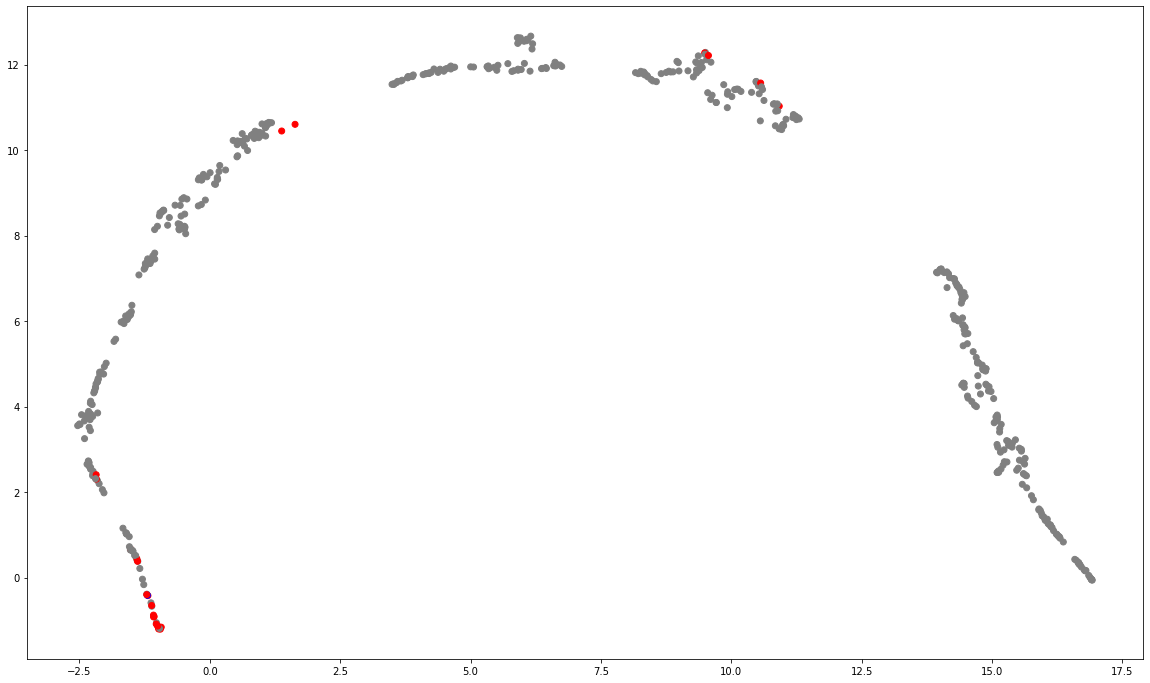

In [583]:
standard_embedding_euclidean_transform_2 = umap.UMAP(n_neighbors=15, 
                                                     metric='euclidean',
                                                     min_dist=0.0,
                                                     n_components=2,
                                                     random_state=42,).fit_transform(kmeans_df_no_hof_2)

plt.scatter(standard_embedding_euclidean_transform_2[:, 0], 
            standard_embedding_euclidean_transform_2[:, 1], 
            c=COLOR_DESC_DF_ADV.color, 
            cmap='Spectral');


In [680]:
labels_adv = hdbscan.HDBSCAN(
    min_samples=20,
    min_cluster_size=5,
).fit_predict(standard_embedding_euclidean_transform_2)

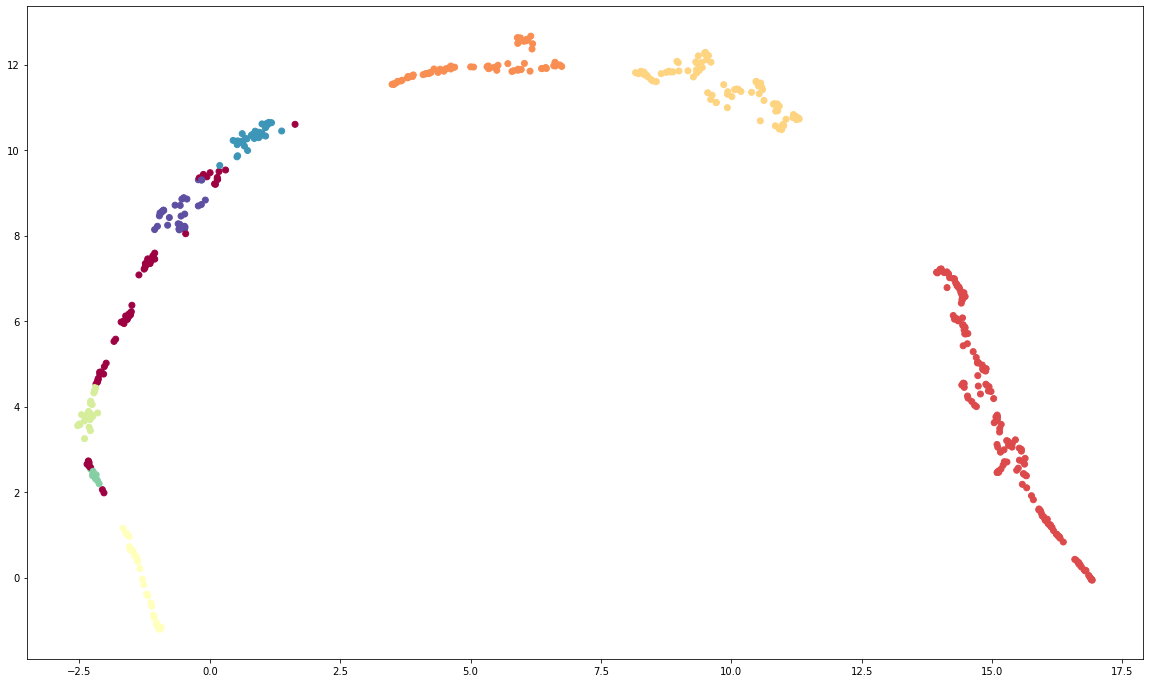

In [681]:
plt.scatter(standard_embedding_euclidean_transform_2[:, 0], 
            standard_embedding_euclidean_transform_2[:, 1], 
            c=labels_adv, 
            cmap='Spectral');

In [671]:
type(pd.DataFrame(COLOR_DESC_DF_ADV.description))

pandas.core.frame.DataFrame

In [672]:
p = umap.plot.interactive(standard_embedding_euclidean_2,
                          hover_data=pd.DataFrame(COLOR_DESC_DF_ADV.description), 
                          labels=labels_adv)
umap.plot.show(p)

In [682]:
contemporary_era_baseball_adv['cluster_label'] = labels_adv

In [683]:
contemporary_era_baseball_adv.groupby('HoF').count()

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
HoF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,521,488,488,459,521,0,521,521,521,521,521,521
1.0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,15,15,13,25,20,25,25,25,25,25,25


In [684]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.playerID == 'martide01']['cluster_label']

118    3
Name: cluster_label, dtype: int64

In [685]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.cluster_label == 3].shape

(45, 71)

In [686]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.cluster_label == 3].groupby('HoF').count()

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
HoF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,20,20,17,28,0,28,28,28,28,28,28
1.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,8,8,7,17,15,17,17,17,17,17,17


In [687]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.cluster_label == 3]

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
0,kaatji01,101.035714,1.378143,9.675000,0.821429,2.721429,4.342857,2.272392,538.714286,0.118229,101.729012,66.770929,1.400211,40.214286,445.142857,102.285714,101.974679,72.785714,12.864286,0.180643,7.7534,-3.5333,45.21,1.464164,4.188893,4.513088,1.825429,1.847214,30.011,1.765500,400.947,4.113336,0.496089,0.457214,72.776893,1.739464,73.857536,0.951179,283,237,898,625,180,18,31,13591,4620,1738,395,1083,2461,0.253693,116.0,128,122.0,6,19023.0,102,2038,NaN,NaN,NaN,25,1.0,NaN,4530.333333,3.452726,1959 - 1983,Jim Kaat,1983,3
2,perryga01,113.240000,1.242960,8.788000,0.704000,2.388000,5.756000,2.562727,665.640000,0.144884,113.532756,86.568080,1.455308,22.360000,619.640000,99.760000,99.843200,85.120000,-8.816000,0.183880,44.9060,-2.6161,93.03,2.030208,3.791620,4.744515,1.801920,1.862920,394.237,14.547920,863.206,4.147668,0.544916,0.437812,97.909400,-1.095320,100.889480,2.018160,314,265,777,690,303,11,53,16051,4938,1846,399,1379,3534,0.235266,164.0,160,108.0,6,21953.0,33,2128,NaN,NaN,NaN,22,1.0,BBWAA,5350.333333,3.105227,1962 - 1983,Gaylord Perry,1983,3
3,johnto01,112.285714,1.327821,9.525000,0.625000,2.435714,4.160714,1.783161,567.642857,0.123400,112.825355,69.082500,1.045032,12.107143,492.535714,98.107143,97.918429,72.035714,7.685714,0.185750,21.6428,-2.4910,62.08,1.533464,4.069774,4.738421,1.825071,1.867000,173.508,6.391464,577.543,4.223742,0.520571,0.446621,78.507000,0.637643,78.232429,1.868143,288,231,760,700,162,4,46,14131,4783,1749,302,1259,2245,0.252881,102.0,187,98.0,16,19692.0,22,2017,NaN,NaN,NaN,26,0.0,NaN,4710.333333,3.341802,1963 - 1989,Tommy John,1989,3
4,niekrph01,109.692308,1.418923,8.965385,0.850000,3.807692,5.150000,1.847430,655.538462,0.141000,110.060381,89.171385,1.621662,30.153846,593.384615,103.807692,103.414346,89.884615,-22.976923,0.184500,50.4554,-2.6080,96.96,1.888442,3.978347,4.685977,1.814615,1.861500,454.514,15.962962,909.984,4.183705,0.532073,0.447569,96.479731,-4.203500,107.365923,2.296846,318,274,864,716,245,29,45,16213,5044,2012,482,1809,3342,0.237287,86.0,226,123.0,42,22677.0,83,2337,NaN,NaN,NaN,24,1.0,BBWAA,5404.333333,3.350645,1964 - 1987,Phil Niekro,1987,3
5,tiantlu01,114.315789,1.235579,8.173684,0.894737,2.947368,6.384211,2.188406,552.578947,0.121195,114.569520,77.064158,1.170579,24.263158,526.210526,103.684211,103.763368,73.684211,9.236842,0.180263,34.0741,-1.3204,65.63,1.730484,3.734525,4.601992,1.793211,1.850105,256.393,14.182474,556.356,4.081595,0.545542,0.445037,83.223368,1.433579,87.178579,1.718579,229,172,573,484,187,15,49,10459,3075,1280,346,1104,2416,0.227206,53.0,27,49.0,4,14365.0,51,1400,NaN,NaN,NaN,19,0.0,NaN,3486.333333,3.304331,1964 - 1982,Luis Tiant,1982,3
6,wiseri01,99.529412,1.305353,9.405882,0.741176,2.341176,4.705882,2.048507,613.882353,0.133082,99.976818,76.057235,0.802318,18.647059,532.882353,101.588235,101.422824,85.470588,-10.200000,0.181294,4.0893,-1.7255,31.93,1.739118,4.060306,4.616359,1.817647,1.851941,52.146,1.982294,324.393,4.092962,0.504188,0.444671,84.033059,-1.699412,88.538000,1.670471,188,181,506,455,138,0,30,9381,3227,1281,261,804,1647,0.255949,83.0,49,44.0,9,13157.0,15,1455,NaN,NaN,NaN,18,0.0,NaN,3127.000000,3.686920,1964 - 1982,Rick Wise,1982,3
7,carltst01,112.444444,1.367667,8.848148,0.933333,3.470370,6.681481,2.256410,566.851852,0.125285,112.912305,79.627815,1.174407,6.592593,573.148148,101.888889,102.248222,78.888889,5.085185,0.182778,39.6832,-2.7065,84.11,1.745937,4.047504,4.698517,1.816148,1.860481,349.450,11.336556,784.013,4.148677,0.523419,0.442300

In [688]:
contemporary_era_baseball_adv.to_csv('../data/contemporary_era_pitchers_clusters_adv.csv')

In [690]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.playerID == 'putzjj01']

,playerID,ERA+,WHIP,H9,HR9,BB9,SO9,SO_W,BIP,BIP_perc,ERA_plus,ER_lg,GR_leverage_index_avg,IPouts_relief,IPouts_start,PPF,PPF_custom,RA,RS_def_total,RpO_replacement,WAA,WAA_adj,WAR,WAR_rep,oppRpG,oppRpG_rep,pyth_exponent,pyth_exponent_rep,runs_above_avg,runs_above_avg_adj,runs_above_rep,teamRpG,waa_win_perc,waa_win_perc_rep,xRA,xRA_def_pitcher,xRA_final,xRA_sprp_adj,W,L,G,GS,CG,SV,SHO,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA,TimeFrame,Name,FinalYear,cluster_label
534,putzjj01,141.916667,1.287917,7.983333,0.725,3.6,9.175,3.255435,127.25,0.027667,142.731849,22.291667,1.34235,141.666667,0.0,99.166667,99.485583,16.916667,13.033333,0.20175,6.3084,1.0864,13.11,0.477558,4.48864,4.643511,1.87125,1.880417,64.582,5.069833,121.568,4.544598,0.505817,0.489975,24.724667,0.27875,22.2985,-1.852333,37,33,572,0,0,189,0,1700,469,194,50,184,599,0.216229,18.0,24,19.0,0,2329.0,357,203,15.0,17.0,42.0,12,0.0,NaN,566.666667,3.081176,2003 - 2014,J. J. Putz,2014,0


In [692]:
contemporary_era_baseball_adv[contemporary_era_baseball_adv.cluster_label == 0].HoF.unique()

array([0.])